<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Batch_Normalization_Accelerating_Deep_Network_Training_by_Reducing_Internal_Covariate_Shift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift**

논문 링크: https://arxiv.org/abs/1502.03167

배치 정규화(batch normalization)는 현재까지도 매우 많이 쓰이는 기술이다. 이 기술이 나온 계기는 바로 **gradient vanishing/exploding** 문제인데, 이 문제 때문에 해당 논문이 나온 2015년에는 residual learning과 batch normalization 기술이 나왔다.

## **Internal Covariate Shift**

최근 딥러닝은 대부분 GPU가 사용되며 동시에 GPU를 효율적으로 사용하기 위해 32~256 size를 갖는 mini-batch SGD 방법을 많이 사용한다.

SGC(stochastic gradient descent) 방법이 효율적이지만, 좋은 효과를 얻을려면 hyper-parameter 설정에 신경을 많이 써야한다. 그 중 특히 learning rate는 학습시 현재 layer의 입력은 모든 이전 layer의 parameter의 변화에 영향을 받으며 이 값에 따라 네트워크가 수렴하지 않는 경우도 있으므로 매우 중요한 요소이다.

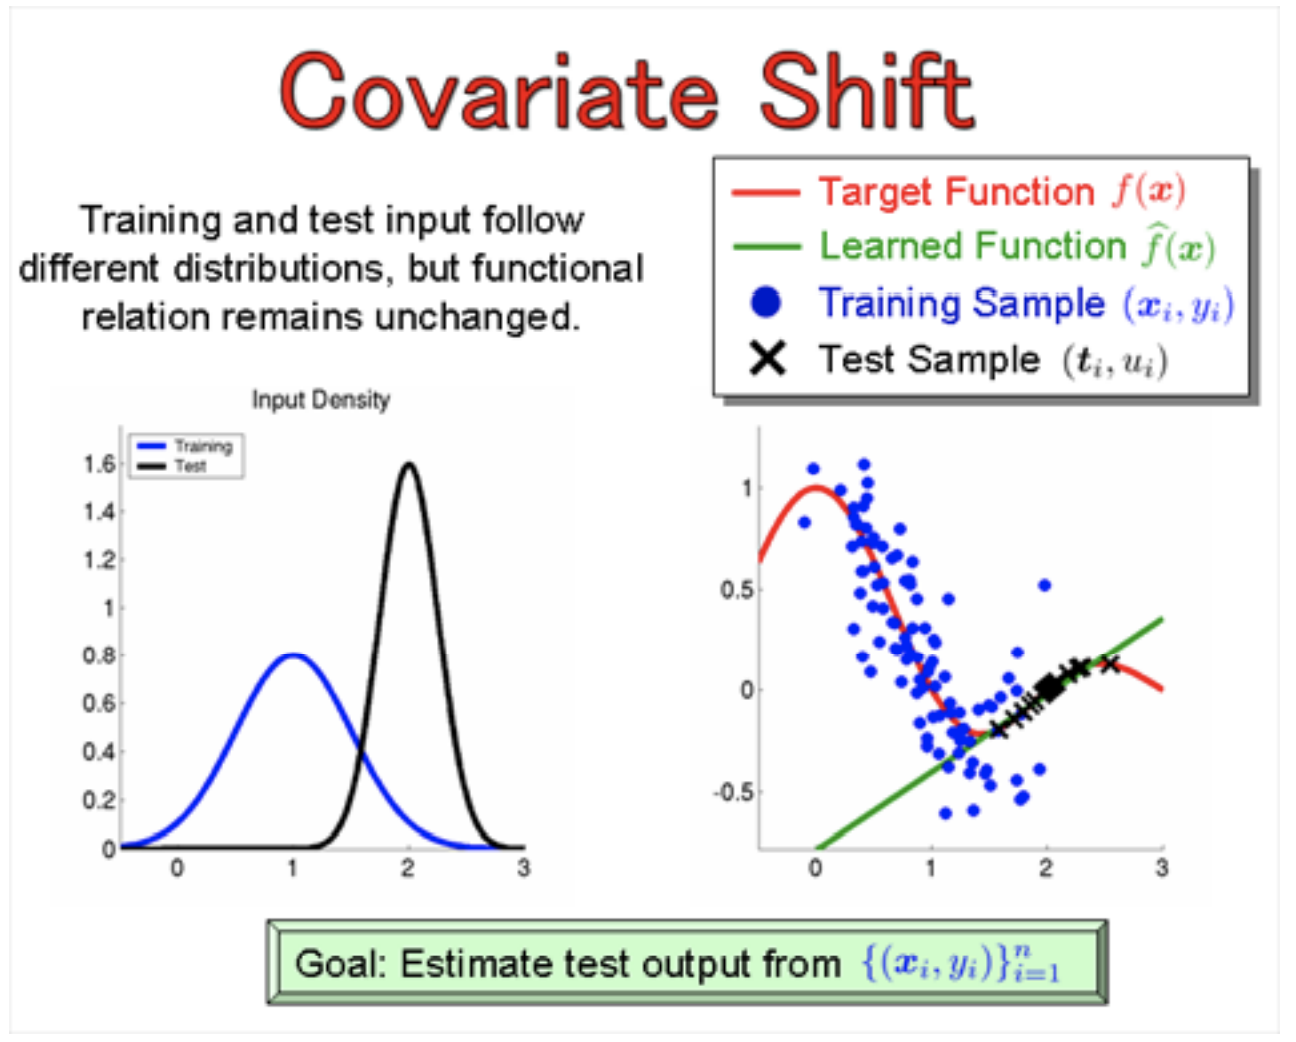

이처럼 **학습하는 도중에 이전 layer의 parameter 변화로 인해 layer의 입력 분포가 바뀌는 현상을 Covariate Shift**라고 한다.

쉽게 비유하면 Quora에서 Debiparad Ghosh가 설명한 것처럼, Covariate shift는 마치 건축ㅇ서 하중에 의해 기둥이 휘어지는것과 비슷하고 보면 된다. 즉, 이런 경우 기둥이 휘어지는 것을 막기 위한 수단이 필요하는 것처럼 딥러닝에서는 **batch normalization**이나 **whitening** 기법을 사용한다.

## **Whitening**

먼저 배치 정규화(batch normalization)을 살펴보기 전에 화이트닝(whitening)을 먼저 살펴보겠다.

whitening은 input을 평균 0, 분산 1로 decorrelate 시킨 것이므로 결과를 더 빨리 수렴하게 한다. 하지만, 문제점이 존재하는데 whitening만 시키면 whitening이 loss function을 변화시키지 않으므로 변정 변수가 무한대로 커질 가능성이 있다. 또한, 계산 cost가 크다.(covariance 계산과 inverse 계산) 그리고 모든 구간에서 미분 가능하지 않는다.

## **Batch Normailzation**

Normalization은 원래 training 전체 집합에 대해서 실시를 하는 것이 최고의 효과를 거둘 수 있다. 하지만, mini-batch SGD 방식을 사용하면 parameter update가 mini-batch 단위로 일어나기 때문에, mini-batch 단위로 batch normalization을 실시한다. 단, mini-batch 집합의 선정은 가급적이면 correlation이 적어 mini-batch가 전체 집합을 대표하는 것이라고 생각해도 무방하도록 해야한다.

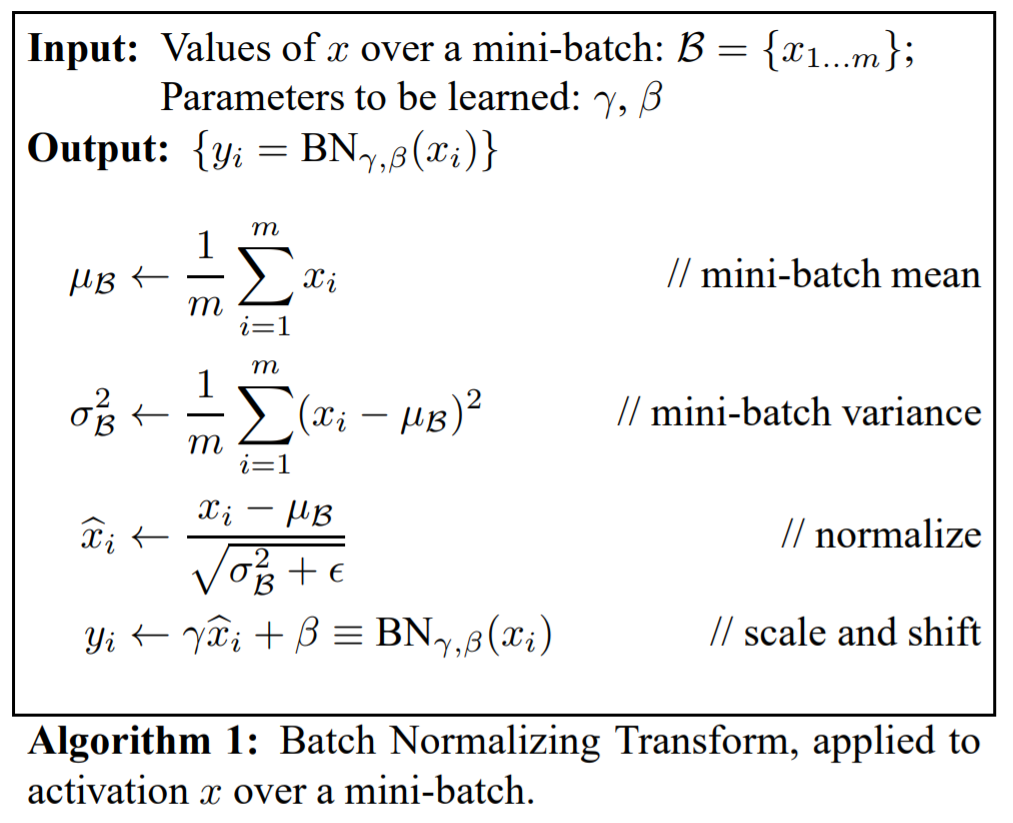

위의 Algorithm 1은 batch normalization 방법에 대해 설명한 것이다. 평균과 분산을 구하고 입력을 정규화 시킨다. 정규화 과정에서 평균을 빼준 뒤 분산으로 나누면 -1 ~ 1 사이의 분포를 가지게 된다.

whitening과의 차이점은 평균과 분산을 구한 후 정규화 시키고 다시 scale과 shift 연산을 위해 γ와β가 추가됨으로써 정규화 시켰던 부분을 원래대로 되돌리는 identity mapping도 가능하며, 학습을 통해 γ와β를 정할 수 있기 때문에 단순하게 정규화만 할때 보다 성능이 더욱 좋아진다.

batch normalization의 **위치는 보통 non-linear activation function 앞쪽**에 배치가 된다. batch normalization은 신경망에 포함되기 때문에 backpropagation을 통해 학습이 가능하다.

### **Train & Test**

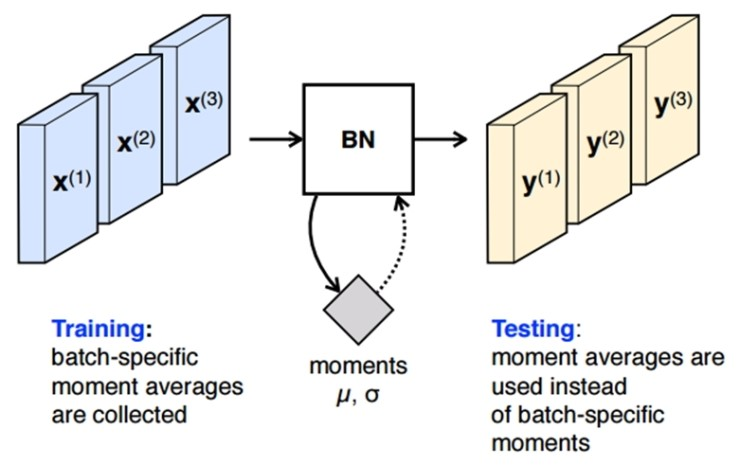

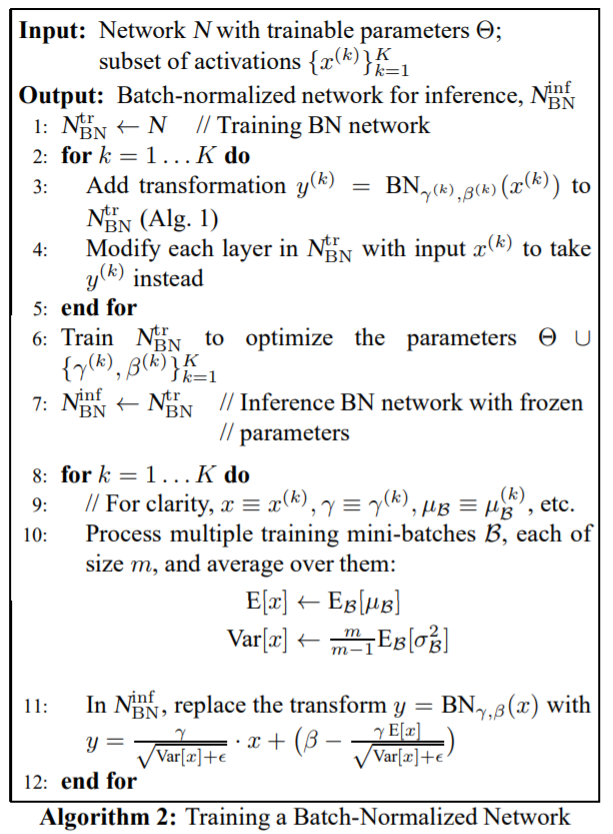

batch normalization은 위의 그림과 Algorithm 2처럼 train과 test에 적용하는 방법이 조금 다른데, train에서는 각 mini-batch마다 γ와β를 구하고 그 값을 정한다. 그리고 test에서는 train에서 구했던 γ와β의 평균을 사용한다.

## **Experiments**

### **Activations over time**

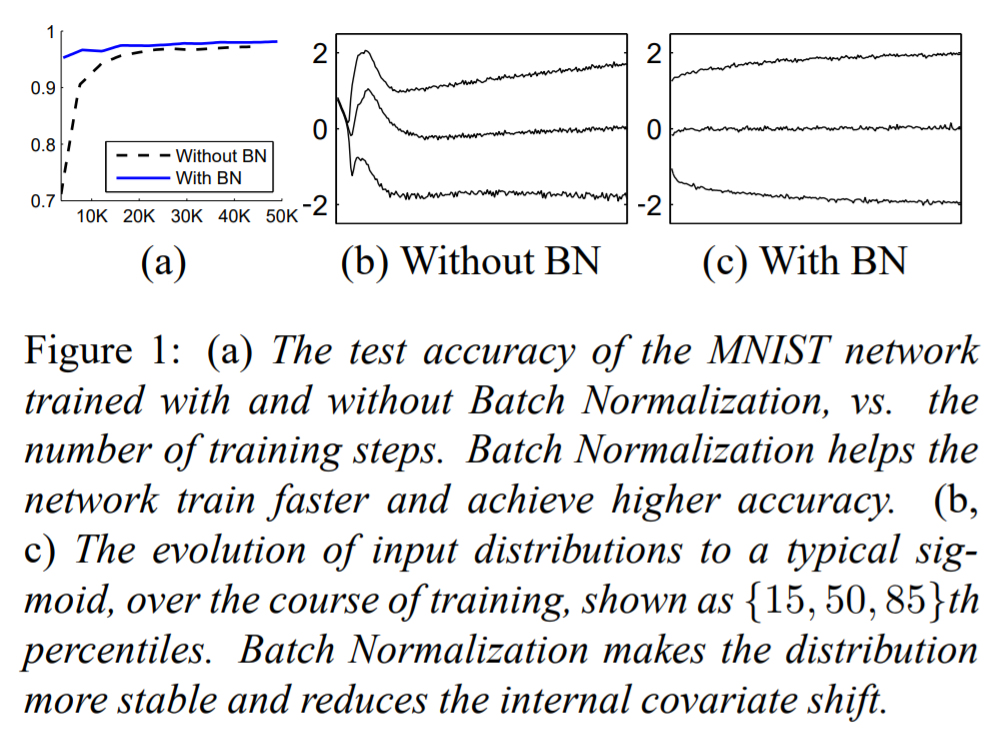

위 그림 Figure 1은 MNIST dataset을 이용하여 fully-connected layer로만 구성된 신경망에 BN을 테스트한 실험이다.

위 그림 Figure 1을 보면 알 수 있듯이 BN(batch normalization)을 사용한 것이 그래프 (a)와 같이 더욱 빠르게 수렴하는 것을 알 수 있다. 그리고 (b), (c) 그래프는 batch normalization을 사용하지 않은 (b)와 사용한 (c)에 대해서 각각 마지막 hidden layer에 있는 특정 뉴련(activation)에서 입력 분포를 나타낸 것이다. (c)의 경우는 (b)와 다르게 값이 흔들리지 않고 안정적이다.

### **Accelerating BN Networks**

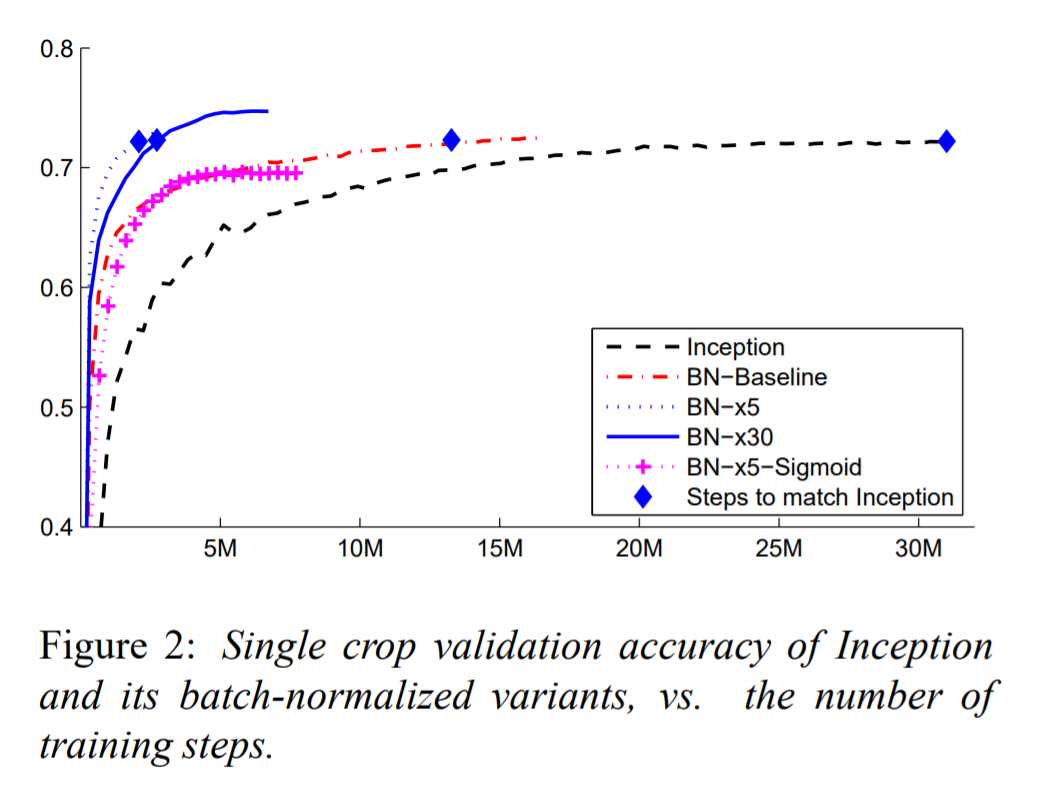

위 그림 Figure2는 fc layer 뿐만 아니라 deep CNN 구조에서도 효과가 있는지 알기 위해 Inception 구조를 약간 변형시켰다. learning rate 값을 올리고, Dropout을 제거했으며 train 데이터로부터 mini-batch를 정할 때 좀 더 철저하게 섞었다. 또한 Local Response Normalization을 제거했다. 총 5개의 구조가 실험에 동원됬는데, Inception은 원래 인셉션 구조이며 초기 learning rate에 0.0015를 사용했다. BN-Baseline은 기존 인셉션과 동일하지만 모든 non-linear앞에 BN을 배치했다. BN-x5는 BN-Baseline에서 초기 learning rate을 5배(=0.0075) 키웠다. BN-x30은 BN-Baseline에서 초기 learning rate를 30배(=0.045) 키웠다. Bn-x5-Sigmoid는 BN-x5와 동일하지만 activation function을 ReLU 대신 Sigmoid를 사용했다.

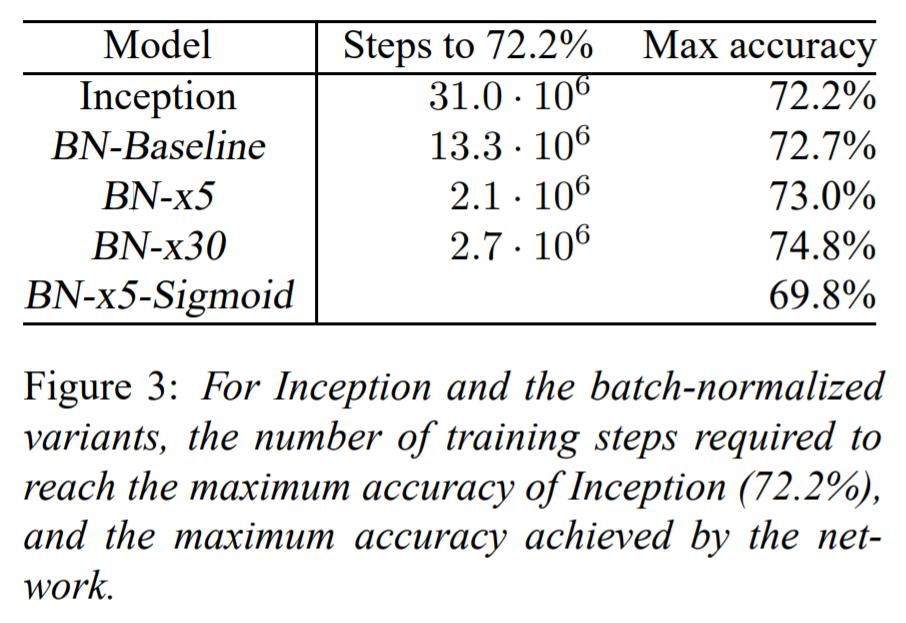

위 그림 Figure 3은 Figure 2의 결과를 도표로 나타낸 것이다. 결과적으로 BN을 사용시 초기 learning rate를 높이면 더욱 빠르게 수렴하는 것 뿐만아니라 최종 정확도도 높았다.

### **Ensemble Classification**

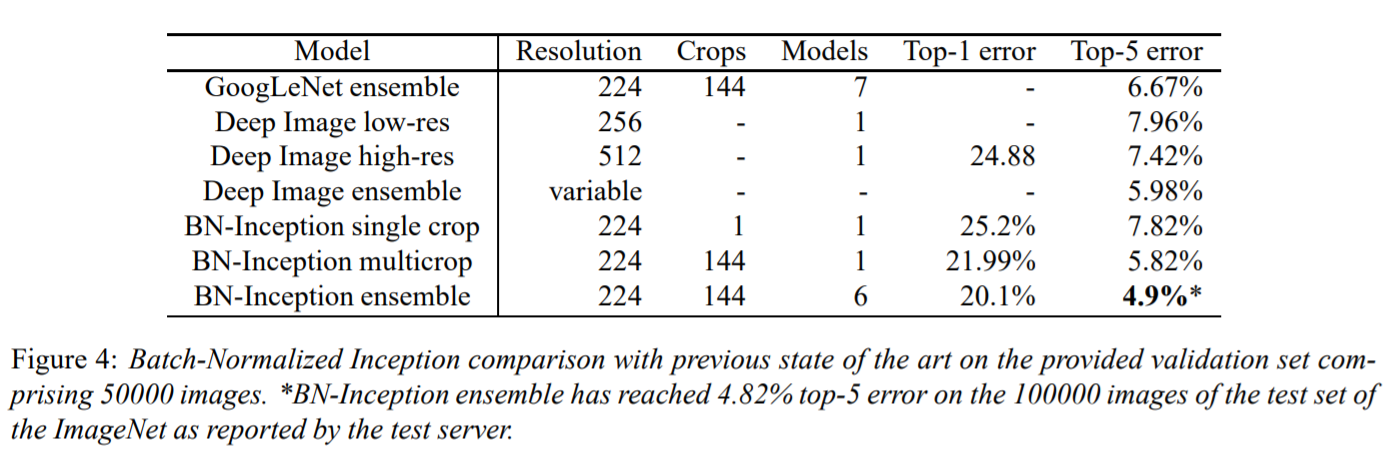

위 그림 Figure 4는 당시 ResNet이 최종 결과를 올리지 못할 당시, Inception에 BN을 적용하고 multi-crop multi-model에 대한 ensemble을 적용할 때 가장 좋았다고 하였다. (ResNet의 최종 결과가 나오면서 결과가 뒤집힌다.)

## **결론**

batch normalization은 단순하게 평균, 분산을 구하는 것이 아닌 γ(감마, Scale)와β(베타, Shift)를 통한 변환을 통해 non-linear 성지을 유지하면서 학습 될 수 있게 해준다. 그리고 이로 인해 Internal Covariate Shift 문제를 해결했고, 빠르게 수렴할 수 있는 점과 parameter 세팅의 민감도 감소(learning rate를 높게 설정 가능), regularization 효과(dropout을 사용 안해도 됨)를 통한 정확도 상승으로 인해 현재까지도 다양한 딥러닝 모델에 사용이 된다.